In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
cr = pd.read_csv('CreditRisk.csv')

In [40]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
cr.shape

(981, 13)

In [42]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
cr.Gender = cr.Gender.fillna('Male')

In [44]:
cr.Self_Employed = cr.Self_Employed.fillna('Yes')

In [45]:
cr.Credit_History = cr.Credit_History.fillna(0)

In [46]:
cr.Dependents = cr.Dependents.fillna(0)

In [47]:
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())

In [48]:
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())

In [49]:
cr.Married = cr.Married.fillna('Yes')

In [50]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
cr.Gender.replace({"Male":1, "Female":0}, inplace = True)
cr.Married.replace({"No":0, "Yes": 1}, inplace = True)
cr.Education.replace({"Graduate": 1, "Not Graduate": 0}, inplace = True)
cr.Self_Employed.replace({"No": 0, "Yes": 1}, inplace = True)
cr.Property_Area.replace({"Semiurban" : 1, "Urban": 2, "Rural": 3}, inplace = True)
cr.Loan_Status.replace({'Y': 1, "N":0}, inplace = True)

In [52]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1


In [53]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
cr_x = cr.iloc[: , 1:12]
cr_y = cr.iloc[:, -1]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
cr_x_train, cr_x_test, cr_y_train, cr_y_test = train_test_split(cr_x, cr_y, test_size = .2)

In [57]:
print(cr_x_train.shape)
print(cr_y_train.shape)
print("-----------------")
print(cr_x_test.shape)
print(cr_y_test.shape)

(784, 11)
(784,)
-----------------
(197, 11)
(197,)


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel = LogisticRegression()
logmodel.fit(cr_x_train, cr_y_train)

pred_value = logmodel.predict(cr_x_test)
pred_value

/Users/raghuladithya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
tab1 = confusion_matrix(pred_value, cr_y_test)
tab1

array([[ 19,  19],
       [ 28, 131]])

In [62]:
tab1.diagonal().sum()/tab1.sum()*100

76.14213197969542

In [63]:
tab2 = confusion_matrix(cr_y_test, pred_value)
tab2

array([[ 19,  28],
       [ 19, 131]])

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [65]:
log_roc_auc = roc_auc_score(cr_y_test, pred_value)
log_roc_auc

0.6387943262411347

In [66]:
roc_auc_score(cr_y_test, pred_value)

0.6387943262411347

In [67]:
pred_full_prob = logmodel.predict_proba(cr_x)

In [68]:
pred_full_prob

array([[0.15753414, 0.84246586],
       [0.20029639, 0.79970361],
       [0.1132677 , 0.8867323 ],
       ...,
       [0.57659215, 0.42340785],
       [0.20907799, 0.79092201],
       [0.19401031, 0.80598969]])

In [69]:
cr_x.shape

(981, 11)

In [70]:
df1 = pd.concat([cr.Loan_ID, pd.Series(pred_full_prob[:, 1])], axis =1)

In [71]:
df1.rename(columns = {df1.columns[0]:'Loan_id', df1.columns[1]:'Pred_Prob'}, inplace = True)

In [72]:
df1.head()

,Loan_id,Pred_Prob
0,LP001002,0.842466
1,LP001003,0.799704
2,LP001005,0.886732
3,LP001006,0.811469
4,LP001008,0.843357


In [73]:
df1.sort_values("Pred_Prob", ascending=False, inplace=True)

In [74]:
df1.head()

,Loan_id,Pred_Prob
185,LP001640,0.967923
133,LP001482,0.956218
695,LP001428,0.954856
443,LP002422,0.952831
183,LP001637,0.952514


In [75]:
pred_value_prob = logmodel.predict_proba(cr_x_test)
pred_value_prob = pd.DataFrame(pred_value_prob)
fpr, tpr, threshold = roc_curve(cr_y_test, pred_value_prob.iloc[:, 1])

In [76]:
pred_value_prob.head()

,0,1
0,0.739762,0.260238
1,0.655178,0.344822
2,0.616120,0.383880
3,0.069054,0.930946
4,0.049046,0.950954


In [77]:
fpr

array([0.        , 0.        , 0.0212766 , 0.0212766 , 0.04255319,
       0.04255319, 0.06382979, 0.06382979, 0.08510638, 0.08510638,
       0.10638298, 0.10638298, 0.14893617, 0.14893617, 0.17021277,
       0.17021277, 0.19148936, 0.19148936, 0.21276596, 0.21276596,
       0.23404255, 0.23404255, 0.25531915, 0.25531915, 0.27659574,
       0.27659574, 0.29787234, 0.29787234, 0.31914894, 0.31914894,
       0.34042553, 0.34042553, 0.36170213, 0.36170213, 0.38297872,
       0.38297872, 0.42553191, 0.42553191, 0.44680851, 0.44680851,
       0.46808511, 0.46808511, 0.4893617 , 0.4893617 , 0.53191489,
       0.53191489, 0.57446809, 0.57446809, 0.59574468, 0.59574468,
       0.68085106, 0.68085106, 0.70212766, 0.70212766, 0.72340426,
       0.72340426, 0.74468085, 0.74468085, 0.78723404, 0.78723404,
       0.85106383, 0.85106383, 0.87234043, 0.87234043, 0.9787234 ,
       0.9787234 , 1.        , 1.        ])

In [78]:
tpr

array([0.        , 0.00666667, 0.00666667, 0.01333333, 0.01333333,
       0.08      , 0.08      , 0.20666667, 0.20666667, 0.25333333,
       0.25333333, 0.26666667, 0.26666667, 0.32      , 0.32      ,
       0.35333333, 0.35333333, 0.45333333, 0.45333333, 0.46      ,
       0.46      , 0.48      , 0.48      , 0.49333333, 0.49333333,
       0.51333333, 0.51333333, 0.52      , 0.52      , 0.57333333,
       0.57333333, 0.60666667, 0.60666667, 0.68666667, 0.68666667,
       0.71333333, 0.71333333, 0.81333333, 0.81333333, 0.83333333,
       0.83333333, 0.84      , 0.84      , 0.84666667, 0.84666667,
       0.85333333, 0.85333333, 0.87333333, 0.87333333, 0.9       ,
       0.9       , 0.90666667, 0.90666667, 0.92666667, 0.92666667,
       0.93333333, 0.93333333, 0.94      , 0.94      , 0.94666667,
       0.94666667, 0.97333333, 0.97333333, 0.98      , 0.98      ,
       0.99333333, 0.99333333, 1.        ])

In [79]:
logmodel.predict_proba(cr_x_test)

array([[0.73976166, 0.26023834],
       [0.65517833, 0.34482167],
       [0.61612019, 0.38387981],
       [0.06905366, 0.93094634],
       [0.04904612, 0.95095388],
       [0.62885877, 0.37114123],
       [0.81409729, 0.18590271],
       [0.19285127, 0.80714873],
       [0.73342028, 0.26657972],
       [0.06671095, 0.93328905],
       [0.5113313 , 0.4886687 ],
       [0.20597041, 0.79402959],
       [0.84859111, 0.15140889],
       [0.09394599, 0.90605401],
       [0.21311392, 0.78688608],
       [0.09008611, 0.90991389],
       [0.18460934, 0.81539066],
       [0.08822249, 0.91177751],
       [0.1547095 , 0.8452905 ],
       [0.30945813, 0.69054187],
       [0.19834728, 0.80165272],
       [0.41655273, 0.58344727],
       [0.10459728, 0.89540272],
       [0.19367195, 0.80632805],
       [0.15110872, 0.84889128],
       [0.22561353, 0.77438647],
       [0.1517346 , 0.8482654 ],
       [0.75687925, 0.24312075],
       [0.0641947 , 0.9358053 ],
       [0.04748614, 0.95251386],
       [0.

In [80]:
logmodel.predict_proba(cr_x_test)

array([[0.73976166, 0.26023834],
       [0.65517833, 0.34482167],
       [0.61612019, 0.38387981],
       [0.06905366, 0.93094634],
       [0.04904612, 0.95095388],
       [0.62885877, 0.37114123],
       [0.81409729, 0.18590271],
       [0.19285127, 0.80714873],
       [0.73342028, 0.26657972],
       [0.06671095, 0.93328905],
       [0.5113313 , 0.4886687 ],
       [0.20597041, 0.79402959],
       [0.84859111, 0.15140889],
       [0.09394599, 0.90605401],
       [0.21311392, 0.78688608],
       [0.09008611, 0.90991389],
       [0.18460934, 0.81539066],
       [0.08822249, 0.91177751],
       [0.1547095 , 0.8452905 ],
       [0.30945813, 0.69054187],
       [0.19834728, 0.80165272],
       [0.41655273, 0.58344727],
       [0.10459728, 0.89540272],
       [0.19367195, 0.80632805],
       [0.15110872, 0.84889128],
       [0.22561353, 0.77438647],
       [0.1517346 , 0.8482654 ],
       [0.75687925, 0.24312075],
       [0.0641947 , 0.9358053 ],
       [0.04748614, 0.95251386],
       [0.

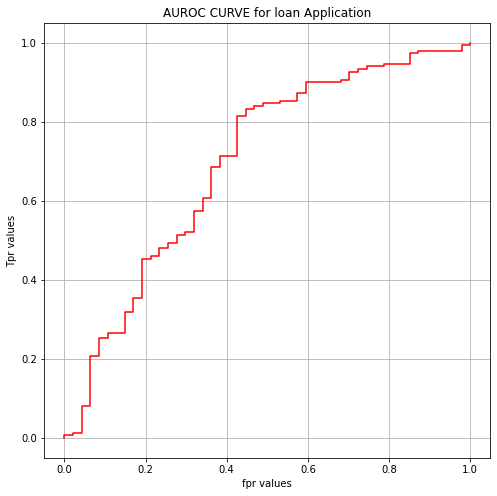

In [82]:
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, color = "red")
plt.xlabel('fpr values')
plt.ylabel('Tpr values')
plt.title('AUROC CURVE for loan Application')
plt.grid()

In [83]:
pred_value_prob = logmodel.predict_proba(cr_x_test)
pred_value_prob[0:10]

array([[0.73976166, 0.26023834],
       [0.65517833, 0.34482167],
       [0.61612019, 0.38387981],
       [0.06905366, 0.93094634],
       [0.04904612, 0.95095388],
       [0.62885877, 0.37114123],
       [0.81409729, 0.18590271],
       [0.19285127, 0.80714873],
       [0.73342028, 0.26657972],
       [0.06671095, 0.93328905]])

In [84]:
logmodel.predict(cr_x_test)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [85]:
from sklearn.metrics import f1_score
f1 =f1_score(cr_y_test, pred_value)
f1

0.8478964401294499

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = 'balanced')

In [87]:
dt.fit(cr_x_train, cr_y_train)

DecisionTreeClassifier(class_weight='balanced')

In [88]:
dt.feature_importances_

array([0.00187299, 0.03576028, 0.04255063, 0.02053566, 0.01726782,
       0.24501032, 0.08602454, 0.14405435, 0.04802026, 0.28964252,
       0.06926064])

In [89]:
print(len(dt.feature_importances_))
print(len(cr_x_train.columns))

11
11


In [91]:
dt.feature_importances_.sum()

1.0

In [92]:
cr_x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [93]:
feature_imporatne = pd.DataFrame({'col_name':cr_x_train.columns, 'Importance': dt.feature_importances_})

In [94]:
feature_imporatne


,col_name,Importance
0,Gender,0.001873
1,Married,0.035760
2,Dependents,0.042551
3,Education,0.020536
4,Self_Employed,0.017268
5,ApplicantIncome,0.245010
6,CoapplicantIncome,0.086025
7,LoanAmount,0.144054
8,Loan_Amount_Term,0.048020
9,Credit_History,0.289643


In [95]:
 feature_imporatne.sort_values('Importance', ascending = False, inplace = True)

In [96]:
feature_imporatne

,col_name,Importance
9,Credit_History,0.289643
5,ApplicantIncome,0.245010
7,LoanAmount,0.144054
6,CoapplicantIncome,0.086025
10,Property_Area,0.069261
8,Loan_Amount_Term,0.048020
2,Dependents,0.042551
1,Married,0.035760
3,Education,0.020536
4,Self_Employed,0.017268


In [97]:
pred_dt = dt.predict(cr_x_test)
pred_dt

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [98]:
tab2 = confusion_matrix(pred_dt, cr_y_test)
tab2

array([[ 22,  39],
       [ 25, 111]])

In [99]:
tab2.diagonal().sum()/tab2.sum()*100

67.51269035532995

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfc = RandomForestClassifier(n_estimators =100, class_weight = 'balanced')
rfc.fit(cr_x_train, cr_y_train)
pred_rf = rfc.predict(cr_x_test)
pred_rf

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [103]:
tab3 = confusion_matrix(pred_rf, cr_y_test)
tab3

array([[ 18,  18],
       [ 29, 132]])

In [104]:
rfc.feature_importances_

array([0.01701914, 0.02485513, 0.04443172, 0.02327612, 0.01836764,
       0.20431609, 0.11345958, 0.18004811, 0.04960011, 0.26518444,
       0.05944192])

In [105]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
abc = AdaBoostClassifier()

In [107]:
abc.fit(cr_x_train, cr_y_train)

AdaBoostClassifier()

In [108]:
pred_ada = abc.predict(cr_x_test)

In [109]:
tab4 = confusion_matrix(pred_ada, cr_y_test)
tab4

array([[ 19,  19],
       [ 28, 131]])

In [110]:
ctg = pd.read_csv('CTG.csv')

In [111]:
ctg_x = ctg.iloc[:, 0:3]

In [112]:
ctg_y = ctg.iloc[: , 3]

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
ctg_x_train, ctg_x_test, ctg_y_train, ctg_y_test = train_test_split(ctg_x, ctg_y, test_size = .2, random_state = 501)

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt = DecisionTreeClassifier(class_weight = 'balanced')

In [117]:
dt.fit(ctg_x_train, ctg_y_train)

DecisionTreeClassifier(class_weight='balanced')

In [119]:
pred = dt.predict(ctg_x_test)

In [120]:
tab = confusion_matrix(pred, ctg_y_test)

In [121]:
tab

array([[262,   8,   7],
       [ 33,  41,   8],
       [ 29,   8,  30]])

In [124]:
dt =DecisionTreeClassifier( )
dt.fit(ctg_x_train, ctg_y_train)

DecisionTreeClassifier()

In [125]:
pred = dt.predict(ctg_x_test)
tab = confusion_matrix(pred, ctg_y_test)
tab

array([[299,  27,  21],
       [ 15,  27,   7],
       [ 10,   3,  17]])

In [126]:
from sklearn.metrics import classification_report


In [127]:
print(classification_report(pred, ctg_y_test))

              precision    recall  f1-score   support

           1       0.92      0.86      0.89       347
           2       0.47      0.55      0.51        49
           3       0.38      0.57      0.45        30

    accuracy                           0.81       426
   macro avg       0.59      0.66      0.62       426
weighted avg       0.83      0.81      0.82       426



In [128]:
from sklearn.feature_selection import RFE

In [129]:
rfc = DecisionTreeClassifier()

In [130]:
rfe_rfc = RFE(rfc, 5)
rfe_rfc.fit(cr_x, cr_y)
rfe_rfc.support_

/Users/raghuladithya/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([False, False,  True, False, False,  True,  True,  True, False,
        True, False])

In [131]:
cr_x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [134]:
feat_impo = pd.DataFrame({'Feature_name' : cr_x.columns, "Imporatance": rfe_rfc.support_})

In [135]:
feat_impo

,Feature_name,Imporatance
0,Gender,False
1,Married,False
2,Dependents,True
3,Education,False
4,Self_Employed,False
5,ApplicantIncome,True
6,CoapplicantIncome,True
7,LoanAmount,True
8,Loan_Amount_Term,False
9,Credit_History,True


In [136]:
lcn = pd.read_csv('LungCapData.csv')
lcn.shape

(725, 6)

In [137]:
def remove_outliers(df,col,k=2):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)]
    print(df1,shape)
    return df1

In [139]:
df1.shape

(695, 6)